# Naive Bayes Classification
1. Package Import 
2. 데이터 불러오기
3. 확률 계산
4. Test 데이터 spam 메일 예측
5. Test Evaluation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 01 Package Import

In [2]:
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report
import math
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 02 데이터 불러오기

In [3]:
train_path = '/content/drive/MyDrive/05_강의자료/210719_SDS/train.csv'
test_path = '/content/drive/MyDrive/05_강의자료/210719_SDS/test.csv'

In [4]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [5]:
train.head()

,label,mail
0,spam,LookAtMe!: Thanks for your purchase of a video...
1,ham,"Aight, I'll hit you up when I get some cash"
2,ham,Don no da:)whats you plan?
3,ham,Going to take your babe out ?
4,ham,No need lar. Jus testing e phone card. Dunno n...


In [6]:
train.loc[0, 'mail']

"LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323."

In [7]:
test.head()

,label,mail
0,ham,"Funny fact Nobody teaches volcanoes 2 erupt, t..."
1,ham,I sent my scores to sophas and i had to do sec...
2,spam,We know someone who you know that fancies you....
3,ham,Only if you promise your getting out as SOON a...
4,spam,Congratulations ur awarded either 傭?00 of CD g...


In [8]:
# 데이터 label 개수 파악
print("Train Label:", np.unique(train['label'], return_counts=True))
print("Test Label:", np.unique(test['label'], return_counts=True))

Train Label: (array(['ham', 'spam'], dtype=object), array([4334,  680]))
Test Label: (array(['ham', 'spam'], dtype=object), array([491,  67]))


## 03 확률 계산

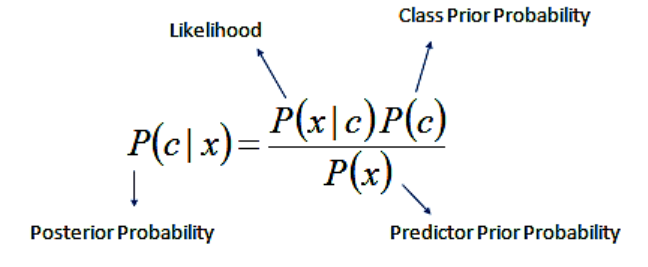

### 03-1 Class Prior Probability 계산

In [9]:
def calculate_prior_prob(df):
    ham_num, spam_num = 0, 0
    for idx, row in df.iterrows():
        if row['label'] == "ham":
            ham_num += 1
        else:
            spam_num += 1
    
    prior_ham = ham_num / len(df)
    prior_spam = spam_num / len(df)

    return prior_ham, prior_spam

In [10]:
prior_ham, prior_spam = calculate_prior_prob(train)

In [11]:
print(f"prior_ham : {prior_ham:.4f} \nprior_spam : {prior_spam:.4f}")

prior_ham : 0.8644 
prior_spam : 0.1356


### 03-2 Likelihood 계산을 위한 word count

In [12]:
# Word count를 위한 함수 정의
def calculate_likelihood(df):
    ham_dict, spam_dict = {}, {}
    ham_all_count, spam_all_count = 0, 0

    for _, row in df.iterrows():

        # mail 문장 토큰화
        token_list = word_tokenize(row['mail'])

        # 해당 열의 label에 따라 dictionary 구분
        if row['label'] == 'ham':
            for w in token_list:
                ham_all_count += 1 
                if w in ham_dict:
                    ham_dict[w] += 1
                else:
                    ham_dict[w] = 1
        
        # spam일 때 처리
        else:
            for w in token_list:
                spam_all_count += 1
                if w in spam_dict:
                    spam_dict[w] += 1
                else:
                    spam_dict[w] = 1

    return ham_dict, spam_dict, ham_all_count, spam_all_count

In [13]:
ham_dict, spam_dict, ham_all_count, spam_all_count = calculate_likelihood(train)

In [14]:
ham_dict

{'Aight': 26,
 ',': 1348,
 'I': 1732,
 "'ll": 205,
 'hit': 10,
 'you': 1501,
 'up': 239,
 'when': 220,
 'get': 259,
 'some': 99,
 'cash': 11,
 'Don': 8,
 'no': 118,
 'da': 121,
 ':': 488,
 ')': 384,
 'whats': 11,
 'plan': 28,
 '?': 1608,
 'Going': 15,
 'to': 1406,
 'take': 82,
 'your': 336,
 'babe': 45,
 'out': 174,
 'No': 123,
 'need': 128,
 'lar': 33,
 '.': 3519,
 'Jus': 10,
 'testing': 2,
 'e': 64,
 'phone': 68,
 'card': 12,
 'Dunno': 17,
 'network': 4,
 'not': 317,
 'gd': 14,
 'i': 832,
 'thk': 37,
 'Me': 22,
 'waiting': 25,
 '4': 158,
 'my': 557,
 'sis': 16,
 '2': 277,
 'finish': 31,
 'bathing': 4,
 'so': 267,
 'can': 262,
 'bathe': 10,
 'Dun': 9,
 'disturb': 8,
 'u': 643,
 'liao': 31,
 'cleaning': 3,
 'ur': 170,
 'room': 30,
 'Probably': 8,
 'want': 133,
 'pick': 59,
 'more': 66,
 'K': 44,
 'sure': 58,
 'am': 166,
 'in': 688,
 'relatives': 2,
 'home': 139,
 'Sms': 1,
 'me': 637,
 'de': 21,
 'Pls': 59,
 '-': 148,
 'The': 69,
 'LAY': 1,
 'MAN': 3,
 '!': 766,
 'Just': 80,
 'let': 49

In [15]:
spam_dict

{'LookAtMe': 2,
 '!': 497,
 ':': 148,
 'Thanks': 12,
 'for': 156,
 'your': 178,
 'purchase': 2,
 'of': 84,
 'a': 326,
 'video': 17,
 'clip': 1,
 'from': 110,
 ',': 332,
 'you': 170,
 "'ve": 9,
 'been': 37,
 'charged': 11,
 '35p': 1,
 '.': 933,
 'Think': 2,
 'can': 21,
 'do': 19,
 'better': 1,
 '?': 455,
 'Why': 5,
 'not': 20,
 'send': 43,
 'in': 64,
 'MMSto': 1,
 '32323': 1,
 'Last': 9,
 'Chance': 5,
 'Claim': 31,
 'ur': 99,
 '傭': 261,
 '50': 39,
 'worth': 12,
 'discount': 8,
 'vouchers': 15,
 'today': 12,
 'Text': 37,
 'SHOP': 4,
 'to': 562,
 '85023': 7,
 'now': 128,
 'SavaMob': 13,
 'offers': 13,
 'mobile': 88,
 'T': 63,
 'Cs': 37,
 'POBOX84': 4,
 'M263UZ': 4,
 '.00': 7,
 'Sub': 5,
 '16': 24,
 'PRIVATE': 13,
 'Your': 61,
 '2004': 8,
 'Account': 13,
 'Statement': 13,
 '078498****7': 1,
 'shows': 28,
 '786': 4,
 'unredeemed': 4,
 'Bonus': 13,
 'Points': 3,
 'To': 66,
 'claim': 74,
 'call': 169,
 '08719180219': 1,
 'Identifier': 13,
 'Code': 15,
 '45239': 3,
 'Expires': 14,
 '06.05.05':

In [16]:
print(f"ham_all_count: {ham_all_count} \nspam_all_count: {spam_all_count}")

ham_all_count: 74291 
spam_all_count: 19477


## 04 Test 데이터 spam 메일 예측

In [17]:
def predict_mail(df, ham_dict, spam_dict, ham_all_count, spam_all_count, prior_ham, prior_spam):
    pred_list = []

    for _, row in df.iterrows():
        temp_tokens = word_tokenize(row['mail'])

        # 해당 메일이 ham 메일일 확률 계산
        ham_prob = math.log(prior_ham) # log(P(ham))
        for token in temp_tokens:
            if token in ham_dict:
                # log(P(ham)) + log(P(word1|ham)) + log(P(word2|ham)) + ...
                # laplace smoothing $ log를 이용한 언더플로우 방지
                ham_prob += math.log((ham_dict[token] + 1) / ham_all_count)

            # ham_dict에 없던 token이 등장한 경우
            else:
                ham_prob += math.log(1 / ham_all_count)

        
        # 해당 메일이 spam 메일일 확률 계싼
        spam_prob = math.log(prior_spam) # log(P(spam))
        for token in temp_tokens:
            if token in spam_dict:
                # log(P(spam)) + log(P(word1|spam)) + log(P(word2|spam)) + ...
                spam_prob += math.log((spam_dict[token] + 1) / spam_all_count)
            
            # spam_dict에 없던 token이 등장한 경우
            else:
                spam_prob += math.log(1 / spam_all_count)

        
        # 확률 비교해서 높은 쪽에 label 할당
        if ham_prob > spam_prob:
            pred_list.append("ham")
        else:
            pred_list.append("spam")

    return pred_list

In [18]:
pred_list = predict_mail(test, ham_dict, spam_dict, ham_all_count, spam_all_count, prior_ham, prior_spam)

In [19]:
pred_list[:10]

['spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham']

## 05 Test Evaluation

In [20]:
test_label = test['label']

In [21]:
print(classification_report(test_label, pred_list))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.97       491
        spam       0.71      0.97      0.82        67

    accuracy                           0.95       558
   macro avg       0.85      0.96      0.89       558
weighted avg       0.96      0.95      0.95       558

